In [2]:
# based on tutorial https://github.com/nachi-hebbar/Time-Series-Forecasting-LSTM/blob/main/RNN_Youtube.ipynb
# only using a single variable, 'glucose'

# this model is, technically speaking, terrible and useless 😐

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('/Users/jonathanlifferth/PycharmProjects/longevity_solutions_ml/0_master_df.csv')
                 
# ,index_col='datetime',parse_dates=True)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.drop(columns=['Unnamed: 0', 'HR', 'Vertical', 'Lateral', 'Sagittal'])
# df = df.asfreq('T').index
# df.index.freq='min'
df

,datetime,glucose
0,2014-10-01 19:14:00,185.4
1,2014-10-01 19:14:00,185.4
2,2014-10-01 19:14:00,185.4
3,2014-10-01 19:14:00,185.4
4,2014-10-01 19:14:00,185.4
...,...,...
1309195,2014-10-04 13:44:00,131.4
1309196,2014-10-04 13:44:00,131.4
1309197,2014-10-04 13:44:00,131.4
1309198,2014-10-04 13:44:00,131.4


In [87]:
df = df.drop_duplicates(subset=['datetime'])
df = df.set_index('datetime')
df

,glucose
datetime,
2014-10-01 19:14:00,185.4
2014-10-01 19:19:00,178.2
2014-10-01 19:23:00,169.2
2014-10-01 19:24:00,176.4
2014-10-01 19:29:00,172.8
...,...
2014-10-04 13:04:00,72.0
2014-10-04 13:09:00,79.2
2014-10-04 13:19:00,97.2


In [88]:
df.head()

,glucose
datetime,
2014-10-01 19:14:00,185.4
2014-10-01 19:19:00,178.2
2014-10-01 19:23:00,169.2
2014-10-01 19:24:00,176.4
2014-10-01 19:29:00,172.8


<AxesSubplot:xlabel='datetime'>

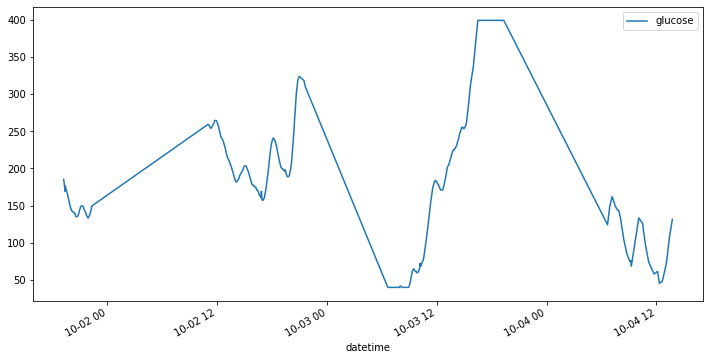

In [89]:
df.plot(figsize=(12,6))

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
# df.index.freq='min'

# results = seasonal_decompose(df['glucose'])
# results.plot();

In [95]:
train_size = int(len(df) * 0.7)
set_index = len(df) - train_size

train = df.iloc[:-set_index]
test = df.iloc[-set_index:]
print(train, test)

                     glucose
datetime                    
2014-10-01 19:14:00    185.4
2014-10-01 19:19:00    178.2
2014-10-01 19:23:00    169.2
2014-10-01 19:24:00    176.4
2014-10-01 19:29:00    172.8
...                      ...
2014-10-03 12:09:00    178.2
2014-10-03 12:14:00    176.4
2014-10-03 12:24:00    171.0
2014-10-03 12:29:00    171.0
2014-10-03 12:39:00    171.0

[222 rows x 1 columns]                      glucose
datetime                    
2014-10-03 12:44:00    174.6
2014-10-03 12:59:00    189.0
2014-10-03 13:09:00    201.6
2014-10-03 13:19:00    205.2
2014-10-03 13:34:00    216.0
...                      ...
2014-10-04 13:04:00     72.0
2014-10-04 13:09:00     79.2
2014-10-04 13:19:00     97.2
2014-10-04 13:24:00    106.2
2014-10-04 13:44:00    131.4

[96 rows x 1 columns]


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [97]:
df.head(),df.tail()

(                     glucose
 datetime                    
 2014-10-01 19:14:00    185.4
 2014-10-01 19:19:00    178.2
 2014-10-01 19:23:00    169.2
 2014-10-01 19:24:00    176.4
 2014-10-01 19:29:00    172.8,
                      glucose
 datetime                    
 2014-10-04 13:04:00     72.0
 2014-10-04 13:09:00     79.2
 2014-10-04 13:19:00     97.2
 2014-10-04 13:24:00    106.2
 2014-10-04 13:44:00    131.4)

In [98]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [99]:
scaled_train[:10]

array([[0.51265823],
       [0.48734177],
       [0.4556962 ],
       [0.48101266],
       [0.46835443],
       [0.4556962 ],
       [0.44303797],
       [0.42405063],
       [0.41139241],
       [0.39240506]])

In [100]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [101]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [102]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.51265823 0.48734177 0.4556962 ]
Predict this y: 
 [[0.48101266]]


In [103]:
X.shape

(1, 3, 1)

In [104]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [106]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [108]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0383
Epoch 2/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0169
Epoch 3/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0145
Epoch 4/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0130
Epoch 5/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 6/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0099
Epoch 7/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 8/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0088
Epoch 9/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0084
Epoch 10/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 11/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 12/50
210/210 [==============================] - 1s 3ms/step - loss: 0.0070
Epoch 13/50
210/210 [====

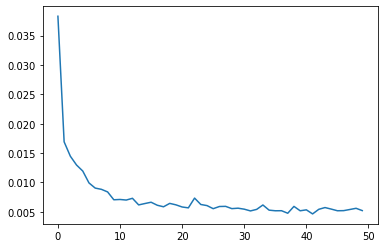

In [109]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [110]:
last_train_batch = scaled_train[-12:]

In [111]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [112]:
model.predict(last_train_batch)

array([[0.46353248]], dtype=float32)

In [113]:
scaled_test[0]

array([0.47468354])

In [114]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [115]:
test_predictions

[array([0.46353248], dtype=float32),
 array([0.46864408], dtype=float32),
 array([0.4770075], dtype=float32),
 array([0.48778045], dtype=float32),
 array([0.50050735], dtype=float32),
 array([0.5144571], dtype=float32),
 array([0.5288981], dtype=float32),
 array([0.54312587], dtype=float32),
 array([0.55645394], dtype=float32),
 array([0.56822526], dtype=float32),
 array([0.5781087], dtype=float32),
 array([0.5853858], dtype=float32),
 array([0.5897622], dtype=float32),
 array([0.5911038], dtype=float32),
 array([0.58946013], dtype=float32),
 array([0.58505446], dtype=float32),
 array([0.57834774], dtype=float32),
 array([0.5699744], dtype=float32),
 array([0.5606707], dtype=float32),
 array([0.5512585], dtype=float32),
 array([0.5425148], dtype=float32),
 array([0.53505313], dtype=float32),
 array([0.52924204], dtype=float32),
 array([0.52531534], dtype=float32),
 array([0.5233878], dtype=float32),
 array([0.5233199], dtype=float32),
 array([0.52500796], dtype=float32),
 array([0.5282

In [116]:
test.head()

,glucose
datetime,
2014-10-03 12:44:00,174.6
2014-10-03 12:59:00,189.0
2014-10-03 13:09:00,201.6
2014-10-03 13:19:00,205.2
2014-10-03 13:34:00,216.0


In [117]:
true_predictions = scaler.inverse_transform(test_predictions)

In [118]:
test['Predictions'] = true_predictions

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_1625/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='datetime'>

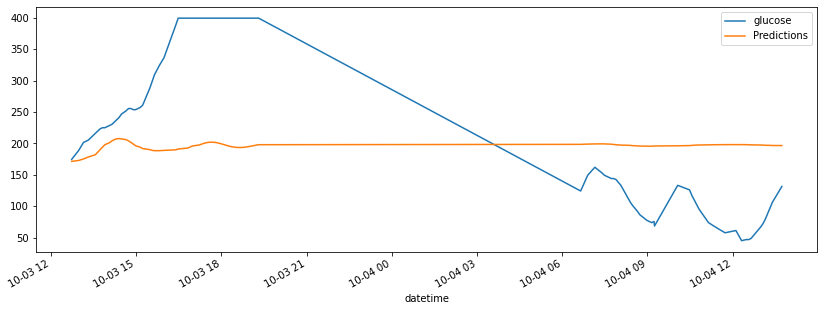

In [119]:
test.plot(figsize=(14,5))


In [121]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['glucose'],test['Predictions']))
print(rmse)

136.67844078735317


In [ ]:
# this model is, technically speaking, terrible and useless 😐